In [27]:
import os
os.environ['CUDA_VISIBLE_DEVICE']='-1'

In [28]:
from tensorflow import keras
from keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [30]:
train_dir="/home/test-14900/Projects/Programming/Dataset/dataset/train"
test_dir="/home/test-14900/Projects/Programming/Dataset/dataset/test"

In [31]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
test_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 182 images belonging to 2 classes.
Found 1275 images belonging to 2 classes.


### Define the AlexNet Model

In [32]:
model=Sequential()

# Layer 1: CNN+ MaxPooling
model.add(Conv2D(96,(11,11),strides=(4,4),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))


# Layer 2: CNN+ MaxPooling
model.add(Conv2D(256,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Layer 3: CNN
model.add(Conv2D(384,(3,3),activation='relu',padding='same'))

# Layer 4: CNN
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))


# Flatten the output for the Fully Connected Layers
model.add(Flatten())


# Full Connected Layer 1
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))


# Full Connected Layer 2
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(train_generator.num_classes,activation='softmax'))


/home/test-14900/anaconda3/envs/conda-env-3-12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 35, 35, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 35, 35, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 17, 17, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,651,906 (109.30 MB)

 Trainable params: 28,651,202 (109.30 MB)

 Non-trainable params: 704 (2.75 KB)

### Model Compilation and Training

In [34]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])


history=model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 925ms/step - accuracy: 0.5385 - loss: 8.6506 - val_accuracy: 0.5459 - val_loss: 0.6927
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 869ms/step - accuracy: 0.6429 - loss: 0.6862 - val_accuracy: 0.4149 - val_loss: 0.6986
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 873ms/step - accuracy: 0.7143 - loss: 0.6467 - val_accuracy: 0.4149 - val_loss: 0.9000
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 874ms/step - accuracy: 0.6319 - loss: 0.6552 - val_accuracy: 0.4149 - val_loss: 0.7966
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 871ms/step - accuracy: 0.6703 - loss: 0.7661 - val_accuracy: 0.4149 - val_loss: 0.7824


### Model Evaluation

In [35]:
test_loss,test_acc=model.evaluate(test_generator)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4149 - loss: 0.7824
Test loss: 0.7824164032936096, Test accuracy: 0.4149019718170166


### Model Saving

In [36]:
model.save('1_alexnet_custom_dataset_model.h5')

### Visualizing Loss and Accuracy

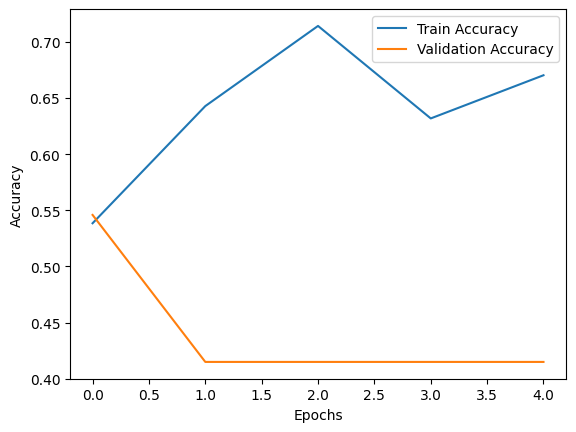

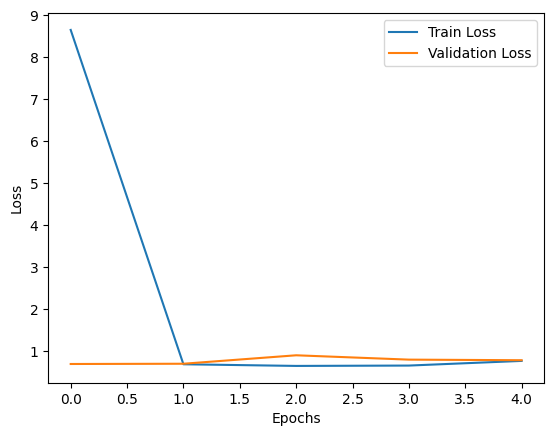

In [37]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Inferencing and Prediction

In [40]:
import numpy as np
def predict_image(model,image_path,class_names):
    from tensorflow.keras.preprocessing.image import load_img,img_to_array

    # load img

    img=load_img(image_path,target_size=(150,150))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)

    prediction=model.predict(img_array)
    predicted_class_index=np.argmax(prediction[0])
    predicted_class=class_names[predicted_class_index]
    return predicted_class


class_names=['daisy','dandelion']
image_path='/home/test-14900/Projects/Programming/Dataset/dataset/test/dandelion/16159487_3a6615a565_n_jpg.rf.6d473a1fe680a3e930f3ff28464c46a9.jpg'
predicted_class=predict_image(model,image_path,class_names)
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class: daisy
